In [3]:
#Week 4 Activity 1(a)-Display photo using opencv on windows bar

import cv2 as cv
import numpy as np

img1 = cv.imread('Coffin_Dance.jpg') #default photo
img2 = cv.imread('Coffin_Dance.jpg', 0)    # synchronize dimension

#show photo dimension size
print(img1.shape)
print(img2.shape)

#resize photo
img1 = cv.resize(img1, (0,0), None, 0.5, 0.5)
img2 = cv.resize(img2, (0,0), None, 0.5, 0.5)

#convert to grayscale
img2 = cv.cvtColor(img2, cv.COLOR_GRAY2BGR)

#vertical stack img1 & img2
ver = np.vstack((img1, img2))

#output
cv.imshow('Coffin_Dance', ver)
cv.waitKey(0)
cv.destroyAllWindows()

(720, 1280, 3)
(720, 1280)


(988, 1023)
(988, 1023)


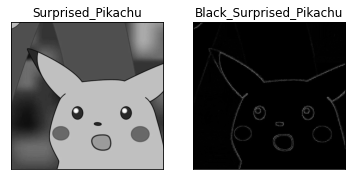

In [2]:
#Week 4 Activity 1(b)-Display photo using opencv on matplotlib graph

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#read from 'Surprised_Pikachu.jpg' and convert to grayscale
img1 = cv.imread('Surprised_Pikachu.jpg', cv.IMREAD_GRAYSCALE)
img2 = cv.Laplacian(img1, cv.CV_64F)
img2 = np.uint8(np.absolute(img2))

#show photo dimension
print(img1.shape)
print(img2.shape)

#resize photo dimesnion
img1 = cv.resize(img1, (0,0), None, 0.5, 0.5)
img2 = cv.resize(img2, (0,0), None, 0.5, 0.5)

#display title on graph in correespondance to the images
title = ['Surprised_Pikachu', 'Black_Surprised_Pikachu']
imgs = [img1, img2]

#output
for i in range(2):
    plt.subplot(1, 2, i+1), plt.imshow(imgs[i], 'gray')
    plt.title(title[i])
    plt.xticks([]), plt.yticks([])

In [24]:
import numpy as np
import cv2 as cv


def rescale_frame(frame, percent=75):
    width = int(frame.shape[1] * percent/100)
    height = int(frame.shape[0] * percent/100)
    dim = (width, height)
    return cv.resize(frame, dim, interpolation =cv.INTER_AREA)

# Create a VideoCapture object
cap = cv.VideoCapture('img_pexels.mp4')
fourcc = cv.VideoWriter_fourcc(*'XVID')
out = cv.VideoWriter('smaller_img_pexels.mp4', fourcc, 20.0, (640,480))




while(True):
    
    #capture framerate
    ret, frame = cap.read()
    frame = rescale_frame(frame, percent=30)
    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == 27:
    
        break

cap.release()
cv.destroyAllWindows()

AttributeError: 'NoneType' object has no attribute 'shape'

In [22]:
# Create a VideoCapture object
cap = cv.VideoCapture('img_pexels.mp4')

# Check if the object has been created successfully
if not cap.isOpened():
    print("Unable to create video")

# Read until the video is completed.
while cap.isOpened():
    ret, frame = cap.read()
    
    # if frame is read then ret is True
    if not ret:
        print("Can't receive frame.")
        break
    
    cv.imshow('frame', frame)
    # Press Esc key to exit (27 is ASCII code for Esc). cv.waitKey() returns 32 bit integer values. You can find the ASCII table
    # on this URL: https://theasciicode.com.ar/
    if cv.waitKey(1) & 0xFF == 27:
        break

# destroy the constructor
cap.release()
cv.destroyAllWindows()

In [1]:
#Week 4 Activity 3-Gnenerate random noise colour and grayscale

import cv2 as cv
import random
import numpy as np

def add_noise(img1):
    
    #This function defines the add salt feature.
    #It removes a random amount of pixel from the original photo file.
    rw, cl = img1.shape
    pixel = random.randint(500, 2000)
    
    #salted pixel random range
    for i in range(pixel):
        y = random.randint(0, rw-1)
        x = random.randint(0, cl-1)
        img1[y][x] = 255
    for i in range(pixel):
        y = random.randint(0, rw-1)
        x = random.randint(0, cl-1)
        img1[y][x] = 0
        
    return img1
    
img1 = cv.imread("Surprised_Pikachu.jpg", cv.IMREAD_GRAYSCALE) #read as grayscale
img1 = cv.resize(img1, (0,0), None, 0.5, 0.5)#resize

cv.imwrite('Surprised_Pikachu2.jpg', add_noise(img1))#read 'add_noise' function and saves in a new jpj file.
img2 = cv.imread('Surprised_Pikachu2.jpg', 0)#read the new jpj file

#resize photo dimesnion
img1 = cv.resize(img1, (0,0), None, 0.5, 0.5)
img2 = cv.resize(img2, (0,0), None, 0.5, 0.5)

#horizontal stacking img1 & img2
hor = np.hstack((img1, img2))

#output
cv.imshow('Surprised_Noisy_Pikachu', img2)#show img2('Surprised_Noisy_Pikachu.jpg') as a standalone
cv.imshow('Surprised_Combined_Pikachu', hor)#show combine grayscale and salted graycale image
cv.waitKey(0)
cv.destroyAllWindows()